> From the PO.DAAC Cookbook, to access the GitHub version of the notebook, follow [this link](https://github.com/podaac/tutorials/blob/master/notebooks/datasets/DirectCloud_Access_SWOT_Oceanography.ipynb)

# Access SWOT Oceanography Data in the Cloud

## Summary
This notebook will show direct access of PO.DAAC archived products in the Earthdata Cloud in AWS Simple Storage Service (S3). In this demo, we will showcase the usage of SWOT Level 2 Low Rate products:
1. **SWOT Level 2 KaRIn Low Rate Sea Surface Height Data Product** - shortname `SWOT_L2_LR_SSH_1.1`
2. **SWOT Level 2 Nadir Altimeter Interim Geophysical Data Record with Waveforms  - SSHA Version 1.0** - shortname `SWOT_L2_NALT_IGDR_SSHA_1.0` 
    - This is a subcollection of the parent collection: `SWOT_L2_NALT_IGDR_1.0`

We will access the data from inside the AWS cloud (us-west-2 region, specifically) and load a time series made of multiple netCDF files into a single xarray dataset.

### Requirement:

This tutorial can **only** be run in an **AWS cloud instance running in us-west-2 region**. 

This instance will cost approximately $0.0832 per hour. The entire demo can run in considerably less time.

### Learning Objectives:
* authenticate for `earthaccess` Python Library using your NASA Earthdata Login
* access DAAC data directly from the in-region S3 bucket without moving or downloading any files to your local (cloud) workspace
* plot the first time step in the data

Note: no files are being downloaded off the cloud, rather, we are working with the data in the AWS cloud.

### Libraries Needed:

Use this while SWOT data has restricted access: need to install the dev version for earthaccess

In [1]:
import xarray as xr
import s3fs
import cartopy.crs as ccrs
from matplotlib import pyplot as plt
import earthaccess
from earthaccess import Auth, DataCollections, DataGranules, Store
%matplotlib inline

### Earthdata Login

An Earthdata Login account is required to access data, as well as discover restricted data, from the NASA Earthdata system. Thus, to access NASA data, you need Earthdata Login. Please visit https://urs.earthdata.nasa.gov to register and manage your Earthdata Login account. This account is free to create and only takes a moment to set up. We use earthaccess to authenticate your login credentials below.

In [2]:
auth = earthaccess.login() 

EARTHDATA_USERNAME and EARTHDATA_PASSWORD are not set in the current environment, try setting them or use a different strategy (netrc, interactive)
You're now authenticated with NASA Earthdata Login
Using token with expiration date: 12/22/2023
Using .netrc file for EDL


## 1. **SWOT Level 2 KaRIn Low Rate Sea Surface Height Data Product**
### Access Files without any Downloads to your running instance

Here, we use the `earthaccess` Python library to search for and then load the data directly into xarray without downloading any files. This dataset is currently restricted to a select few people, and can only be accessed using the version of `earthaccess` reinstalled above. If zero granules are returned, make sure the correct version '0.5.4' is installed.

In [3]:
#retrieves granule from the day we want
karin_results = earthaccess.search_data(short_name = 'SWOT_L2_LR_SSH_1.1', 
                                        temporal = ("2023-04-09 12:00:00", "2023-04-09 19:43:00"), 
                                        granule_name = '*Expert*') # filter by files with "Expert" in file name. This collection has subcollections of 'Basic', 'Windwave', 'Unsmoothed' and 'Expert' granules.

Granules found: 10


### Open with xarray
The files we are looking at are about 11-13 MB each. So the 10 we're looking to access are about ~100 MB total.

In [4]:
#opens granules and load into xarray dataset
ds = xr.open_mfdataset(earthaccess.open(karin_results), combine='nested', concat_dim="num_lines", decode_times=False, engine='h5netcdf')
ds

 Opening 10 granules, approx size: 0.26 GB


QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/10 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:                                (num_lines: 98655, num_pixels: 69,
                                            num_sides: 2)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    longitude                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    latitude_nadir                         (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir                        (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels, num_sides
Data variables: (12/96)
    time                                   (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    time_tai                               (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    ssh_karin                              (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_qual                         (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssh_karin_uncert                       (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ssha_karin                             (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    ...                                     ...
    sea_state_bias_cor                     (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    sea_state_bias_cor_2                   (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    swh_ssb_cor_source                     (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    swh_ssb_cor_source_2                   (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source              (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    wind_speed_ssb_cor_source_2            (num_lines, num_pixels) float32 dask.array<chunksize=(9866, 69), meta=np.ndarray>
Attributes: (12/60)
    Conventions:                                   CF-1.7
    title:                                         Level 2 Low Rate Sea Surfa...
    source:                                        Ka-band radar interferometer
    history:                                       2023-08-17T09:27:36Z : Cre...
    platform:                                      SWOT
    reference_document:                            D-56407_SWOT_Product_Descr...
    ...                                            ...
    ellipsoid_flattening:                          0.0033528106647474805
    institution:                                   JPL
    references:                                    V1.1
    equator_time:                                  2023-04-09T12:04:18.503000Z
    equator_longitude:                             151.03
    product_version:                               01

### Cross Over Calibration Correction

In order to get the corrected SSHA, we must compute a new column like the following:

In [5]:
ds['ssha_karin_corrected'] = ds.ssha_karin + ds.height_cor_xover
ds.ssha_karin_corrected

<xarray.DataArray 'ssha_karin_corrected' (num_lines: 98655, num_pixels: 69)>
dask.array<add, shape=(98655, 69), dtype=float64, chunksize=(9866, 69), chunktype=numpy.ndarray>
Coordinates:
    latitude         (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    longitude        (num_lines, num_pixels) float64 dask.array<chunksize=(9866, 69), meta=np.ndarray>
    latitude_nadir   (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
    longitude_nadir  (num_lines) float64 dask.array<chunksize=(9866,), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels

### Plot

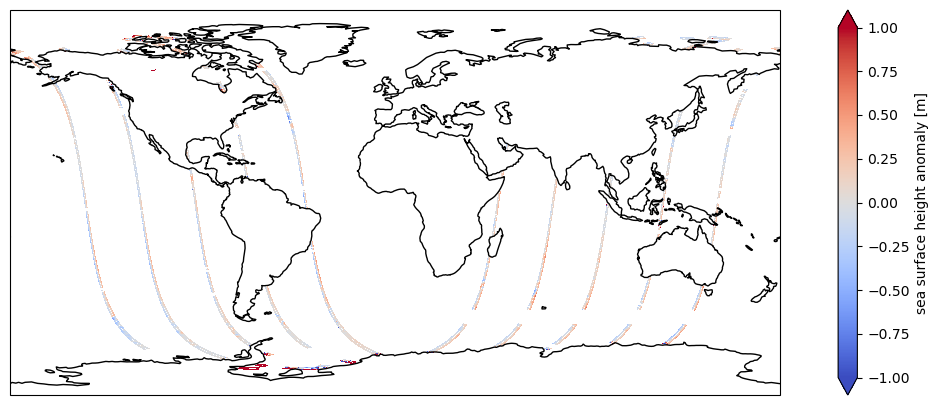

In [6]:
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ds.ssha_karin.plot.pcolormesh(
 ax=ax, transform=ccrs.PlateCarree(), x="longitude", y="latitude", vmin = -1, vmax=1, cmap='coolwarm', add_colorbar=True
)
ax.coastlines()

## 2. **SWOT Level 2 Nadir Altimeter Interim Geophysical Data Record with Waveforms - SSHA Version 1.0**
### Access Files without any Downloads to your running instance

Here, we use the `earthaccess` Python library to search for and then load the data directly into xarray without downloading any files.

In [6]:
#retrieves granule from the day we want
nadir_results = earthaccess.search_data(short_name = 'SWOT_L2_NALT_IGDR_SSHA_1.0', temporal = ("2023-06-25 12:00:00", "2023-06-25 19:43:00"))

Granules found: 10


In [7]:
for g in nadir_results:
    print(earthaccess.results.DataGranule.data_links(g, access='direct'))

['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_005_20230625_113237_20230625_122343.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_006_20230625_122343_20230625_131448.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_007_20230625_131448_20230625_140554.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_008_20230625_140554_20230625_145659.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_009_20230625_145659_20230625_154805.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_010_20230625_154805_20230625_163911.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_011_20230625_163911_20230625_173017.nc']
['s3://podaac-swot-ops-cumulus-protected/SWOT_L2_NALT_IGDR_1.0/SWOT_IPR_2PfP563_012_20230625_173017_20230625_182122.nc']
['s3://podaac-swot-ops-cumulus-p

In [8]:
#opens granules and load into xarray dataset, for xarray to work, make sure 'group' is specified.
ds_nadir = xr.open_mfdataset(earthaccess.open(nadir_results), combine='nested', concat_dim="time", decode_times=False, engine='h5netcdf', group='data_01')
ds_nadir

 Opening 10 granules, approx size: 0.0 GB


QUEUEING TASKS | : 0it [00:00, ?it/s]

PROCESSING TASKS | :   0%|          | 0/10 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/10 [00:00<?, ?it/s]

<xarray.Dataset>
Dimensions:                            (time: 28814)
Coordinates:
  * time                               (time) float64 7.41e+08 ... 7.41e+08
    latitude                           (time) float64 dask.array<chunksize=(2886,), meta=np.ndarray>
    longitude                          (time) float64 dask.array<chunksize=(2886,), meta=np.ndarray>
Data variables: (12/31)
    time_tai                           (time) float64 dask.array<chunksize=(2886,), meta=np.ndarray>
    surface_classification_flag        (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    rad_side_1_surface_type_flag       (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    rad_side_2_surface_type_flag       (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    alt_qual                           (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    rad_qual                           (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    ...                                 ...
    pole_tide                          (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    internal_tide_hret                 (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    wind_speed_alt                     (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    wind_speed_alt_mle3                (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    rad_water_vapor                    (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>
    rad_cloud_liquid_water             (time) float32 dask.array<chunksize=(2886,), meta=np.ndarray>

### Plot

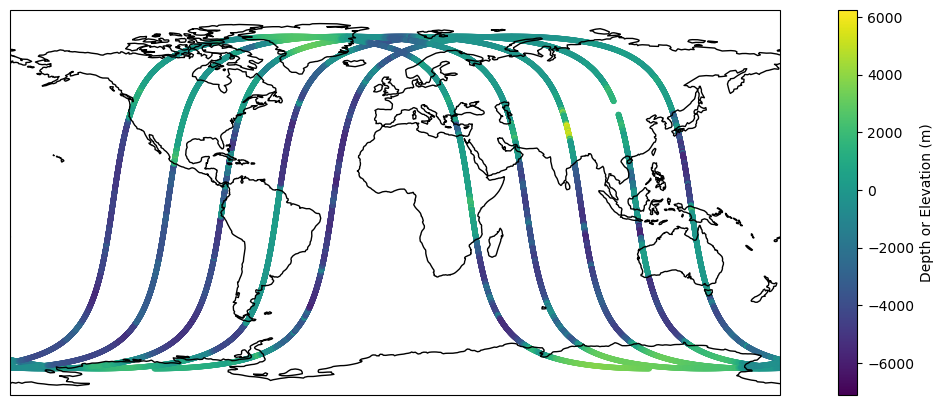

In [9]:
plt.figure(figsize=(15, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
plt.scatter(x=ds_nadir.longitude, y=ds_nadir.latitude, c=ds_nadir.depth_or_elevation, marker='.')
plt.colorbar().set_label('Depth or Elevation (m)')

## A final word...

Accessing data completely from S3 and in memory are affected by various things.

1. The format of the data - archive formats like NetCDF, GEOTIFF, HDF vs cloud optimized data structures (Zarr, kerchunk, COG). Cloud formats are made for accessing only the pieces of data of interest needed at the time of the request (e.g. a subset, timestep, etc).
2. Tools like xarray make a lot of assumptions about how to open and read a file. Sometimes the internals don't fit the xarray 'mould' and we need to continue to work with data providers and software providers to make these two sides work together. Level 2 data (non-gridded), specifically, suffers from some of the assumptions made.